In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [4]:
dta = pd.read_csv("train.csv")

In [5]:
dta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dta[['Sex']] = (dta[['Sex']] == 'male')*1
dta.loc[dta['Embarked'] == 'S', 'Embarked'] = 1
dta.loc[dta['Embarked'] == 'C', 'Embarked'] = 2
dta.loc[dta['Embarked'] == 'Q', 'Embarked'] = 3

In [7]:
# dta2 = dta.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1)
dta2 = dta.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
dta2.dropna(subset=['Embarked'],inplace= True)

In [8]:
labels = np.array(dta2['Survived'])
dta2 = dta2.drop('Survived', axis = 1)

In [9]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(dta2[['Age']])
dta2[['Age']]= imputer.transform(dta2[['Age']])

F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
dta2 = np.array(dta2)

In [11]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [12]:
rf.fit(dta2, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
print(rf.feature_importances_)

[0.08800136 0.25779028 0.26162298 0.04950761 0.0382536  0.27095451
 0.03386966]


In [14]:
predictions = rf.predict(dta2)

[[544   5]
 [ 11 329]]


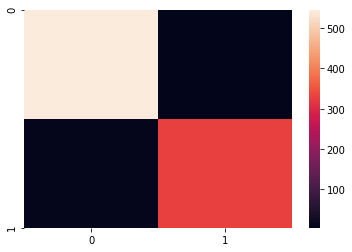

In [15]:
accuracy = 100 - np.mean(100 * (abs(predictions - labels) ))
CM = confusion_matrix(labels, predictions)
print(CM)
import seaborn
seaborn.heatmap(CM)
plt.show()

0.997409728919


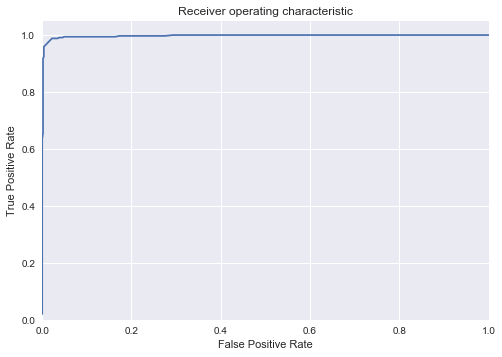

In [32]:
rf_probs = rf.predict_proba(dta2)[:, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(labels, rf_probs)
    roc_auc[i] = auc(fpr[i], tpr[i])
print roc_auc_score(labels, rf_probs)
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [33]:
accuracy

98.200224971878512

In [34]:
test = pd.read_csv("test.csv")

In [35]:
test = test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [36]:
test[['Sex']] = (test[['Sex']] == 'male')*1
test.loc[test['Embarked'] == 'S', 'Embarked'] = 1
test.loc[test['Embarked'] == 'C', 'Embarked'] = 2
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 3

In [37]:
imputer_test = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer_test = imputer.fit(test[['Age']])
test[['Age']]= imputer_test.transform(test[['Age']])

In [38]:
forecast = rf.predict(test)

In [39]:
forecast

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [40]:
for item in forecast: print item

0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
1
0
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
1
0
1
0
0
1
0
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
